In [1]:
import pandas as pd
import numpy as np
import math

from scipy.stats import beta

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

font_size = 9

params = {'text.usetex' : True,
          'pgf.rcfonts' : False,
          'pgf.preamble' : [r"\usepackage[utf8]{inputenc}",
                            r"\usepackage[T1]{fontenc}"],
          'font.family' : 'serif',
          'font.size' : font_size,        # controls default text sizes
          'axes.titlesize' : font_size,   # fontsize of the axes title
          'axes.labelsize' : font_size,   # fontsize of the x and y labels
          'xtick.labelsize' : font_size,  # fontsize of the tick labels
          'ytick.labelsize' : font_size,  # fontsize of the tick labels
          'legend.fontsize' : font_size,  # legend fontsize
          'figure.titlesize' : font_size, # fontsize of the figure title
          }
plt.rcParams.update(params)

# Figure width and height
textwidth=6.50127

fig_width = textwidth/2
golden_mean = (math.sqrt(5)-1.0)/2.0
fig_height = fig_width*golden_mean

#fw = textwidth*.6
#fh = fw*matplotlib.rcParams['figure.figsize'][1]/\
#matplotlib.rcParams['figure.figsize'] [0]



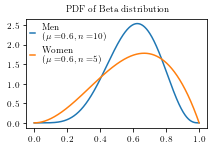

In [159]:
a_f, b_f = 3*1, 2*1
a_m, b_m = a_f*2, b_f*2
#a_f, b_f = 3*2, 1*2
#a_m, b_m = a_f*3, b_f*3

# Mean and sample size
mu_m = beta.moment(1,a_m,b_m)
mu_f = beta.moment(1,a_f,b_f)
n_m, n_f = a_m + b_m, a_f + b_f

x = np.linspace(0,1,1000)

fig = plt.figure()
ax = plt.axes()

ax.plot(x, beta.pdf(x,a_m,b_m), 
        label='Men \n($\mu = $' + str(round(mu_m,2)) 
        + ', $n = $' + str(n_m)
        + ')')
ax.plot(x, beta.pdf(x,a_f,b_f), 
        label='Women \n($\mu = $' + str(round(mu_f,2)) 
        + ', $n = $' + str(n_f)
        + ')')

ax.legend(loc='upper left',
          handlelength=0.5,
          frameon=False,
          borderpad=0)
ax.set_title('PDF of Beta distribution')

#fig.set_size_inches(w=fw,h=fh)
fig.set_size_inches(fig_width,fig_height) 
plt.savefig('beta_example.pgf',
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )


In [272]:
delta = 0.96
nu = 1/10

c_j_m = np.ceil(delta/(1-delta)) - n_m
c_j_f = np.ceil(delta/(1-delta)) - n_f

h_j0_m = round(a_m*nu,1)
h_j0_f = round(a_f*nu,1)

dd = np.ceil(delta/(1-delta))

c_jt = 7 # uh oh 10 doesnt' work is this correct?
h_jt = .8
# implies 
a_jt_m, a_jt_w = h_jt/nu, h_jt/nu

#a_jt_f = (h_jt - h_j0_f)/nu + a_f
#a_jt_m = (h_jt - h_j0_m)/nu + a_m

I_jt_m = (h_jt/(1-delta))*(dd*delta**(dd - c_jt - n_m))/(c_jt + n_m)
I_jt_f = (h_jt/(1-delta))*(dd*delta**(dd - c_jt - n_f))/(c_jt + n_f)

print(round(I_jt_m,2), round(I_jt_f,2))

delta**(-n_f), delta**(-n_m)

print(round(-n_m*np.log(delta) - np.log(c_jt + n_m),2))
print(round(-n_f*np.log(delta) - np.log(c_jt + n_f),2))

print(round(delta**(-n_m)/(c_jt + n_m),3))
print(round(delta**(-n_f)/(c_jt + n_f),3))

21.22 24.51
-2.42
-2.28
0.088
0.102
